## Image Classification using CNN

In this notebook, we will delve into the classification of small images from the CIFAR-10 dataset using TensorFlow's Keras datasets. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. These classes include airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Our approach to this classification task involves using Convolutional Neural Networks (CNNs). CNNs are particularly well-suited for image classification tasks due to their ability to automatically learn hierarchical features from the image data, making them a powerful tool for this type of problem. Through this notebook, we aim to demonstrate the effectiveness of CNNs in classifying images from the CIFAR-10 dataset into their respective classes.


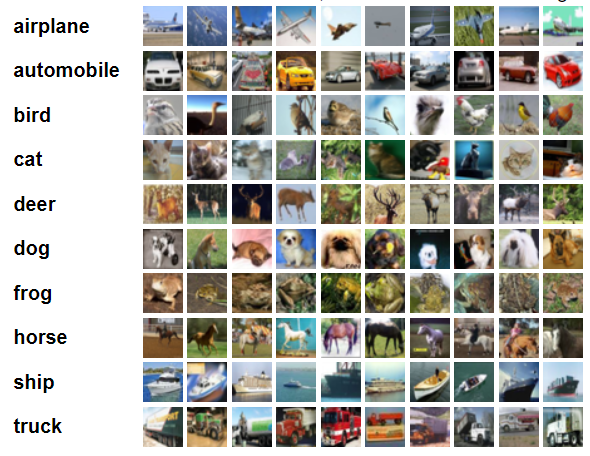

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the data

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 223s 1us/step


(50000, 32, 32, 3)

### lets analyze the dataset

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

This is a 2D array we would like to convert it into a one dimensional array

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

Now let's establish an array for the classes

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plotting the images to analyze

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

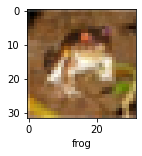

In [14]:
plot_sample(X_train, y_train, 0)

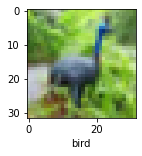

In [15]:
plot_sample(X_train, y_train, 6)

### Normalizing the training data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN
Let's build an ANN first then we will compare and contrast with CNN

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(3000, activation= 'relu'),
    layers.Dense(10, activation='softmax')
    
])
ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 150s 94ms/step - loss: 1.8065 - accuracy: 0.3604
Epoch 2/5
1563/1563 [==============================] - 135s 87ms/step - loss: 1.6184 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5364 - accuracy: 0.4601
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4747 - accuracy: 0.4818
Epoch 5/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4254 - accuracy: 0.5007


We notice that the accuracy after 5 epochs is around 50%

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.63      0.53      1000
           1       0.47      0.78      0.59      1000
           2       0.26      0.60      0.36      1000
           3       0.35      0.36      0.36      1000
           4       0.40      0.34      0.37      1000
           5       0.56      0.22      0.31      1000
           6       0.50      0.54      0.52      1000
           7       0.73      0.33      0.45      1000
           8       0.72      0.42      0.53      1000
           9       0.75      0.28      0.40      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.44     10000
weighted avg       0.52      0.45      0.44     10000



We have a poor F1 score and we can significantly improve this by using CNN

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation='softmax')
]
)

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4868 - accuracy: 0.4626
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1294 - accuracy: 0.5998
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0040 - accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9240 - accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8697 - accuracy: 0.6964
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8141 - accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7771 - accuracy: 0.7285
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7393 - accuracy: 0.7418
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7036 - accuracy: 0.7533
Epoch 10/10
1563/1563 [==============================] - 56s 36m

With CNNs, after 5 epochs, the accuracy reached approximately 75%, which marks a notable improvement over ANNs. CNNs excel in image classification, offering exceptional accuracy. Additionally, they require less computation compared to simple ANNs, as max pooling reduces image dimensions while retaining important features.

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9009 - accuracy: 0.6982


[0.9008803963661194, 0.698199987411499]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.18984131e-03, 1.67752678e-05, 1.08200395e-04, 7.76338458e-01,
        6.90184534e-04, 1.05427124e-01, 1.57053247e-02, 8.26846226e-05,
        9.82051492e-02, 2.23634392e-03],
       [3.09706330e-02, 5.38502857e-02, 1.01358282e-05, 1.18178519e-07,
        1.89304032e-07, 8.68305321e-08, 1.01873909e-09, 7.10106818e-08,
        9.11634982e-01, 3.53347301e-03],
       [1.00767404e-01, 3.60739708e-01, 2.04970269e-03, 1.41907902e-02,
        9.20978375e-04, 2.13728915e-03, 2.54469318e-03, 2.43726783e-04,
        4.12993282e-01, 1.03412434e-01],
       [9.15909111e-01, 1.08448963e-03, 5.47292037e-03, 1.49583654e-03,
        8.57020356e-03, 6.52765957e-05, 4.26568178e-04, 5.83755027e-05,
        6.68211952e-02, 9.60614416e-05],
       [7.80943310e-07, 1.66716791e-06, 4.05357815e-02, 1.02286667e-01,
        2.81198114e-01, 1.16479304e-03, 5.74792445e-01, 1.61622665e-05,
        2.49247569e-06, 1.14164686e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 5s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.85      0.76      0.80      1000
           2       0.70      0.46      0.55      1000
           3       0.48      0.55      0.51      1000
           4       0.52      0.78      0.63      1000
           5       0.61      0.58      0.59      1000
           6       0.80      0.69      0.74      1000
           7       0.77      0.71      0.74      1000
           8       0.85      0.76      0.80      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



With CNNs, after 5 epochs, the accuracy reached approximately 70%, which marks a notable improvement over ANNs. CNNs excel in image classification, offering exceptional accuracy. Additionally, they require less computation compared to simple ANNs, as max pooling reduces image dimensions while retaining important features.